In [ ]:
#===========================================================
# Assignment는 아래쪽에 있습니다.
# ctrl+F 로 아래 문장 중 하나를 검색하시면 빠르게 확인할 수 있습니다.
# ===========================================================

# Followings are Assignments 

# Complete 80% or more quantile minimum value spectrum drawing

# Upsampling (interpolation)

# Decimation

#===========================================================

In [104]:
# import necessary pacakages
import sys
import numpy as np
import matplotlib
import librosa
from matplotlib import pyplot as plt
import librosa.display

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift


In [415]:
# parameters for signal analysis and drawing
#FIG_SIZE = (15,10)
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
#cmap_plot = plt.cm.bone # default colormap for spectrogram, gray
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray
#cmap_plot = plt.cm.plasma 
#cmap_plot = plt.cm.inferno
Fs = 16000

#wavfile = 'kdigits0-2.wav'  # 0.6 - 1.1
wavfile = 'kdigits1-3.wav'  # 1.0 - 1.5

In [130]:
# load audio file with Librosa
x, Fs = librosa.load(wavfile, sr = Fs)

# 더 잘 보려고 시간축에서 조금 잘라낸다.
x_clip=x[Fs:(Fs*3)//2] # 음성이 있는 1~1.5[sec]정도를 보고자 함
x=x_clip

print(x,x.shape)

Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
print('Fs = %d, Ns = %d, Nf = %d' % (Fs, Ns, Nf))

[-6.1035156e-05  9.1552734e-05  1.5258789e-04 ...  2.1362305e-04
  1.2207031e-04  1.5258789e-04] (8000,)
Fs = 16000, Ns = 160, Nf = 320


Text(0.5, 1.0, 'Waveform')

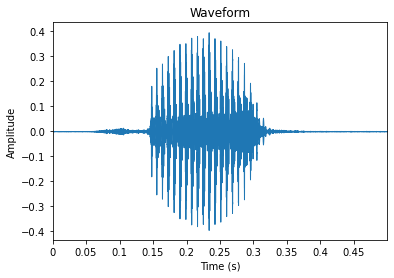

In [131]:
#plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(x, sr=Fs)
# plt.plot(x) works as well 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Spectrogram (dB)')

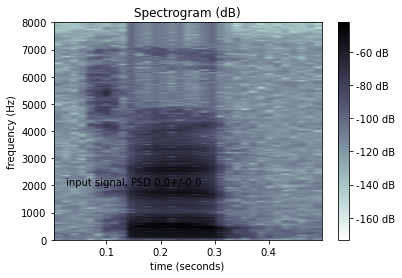

In [134]:
# draw spectrum by matplotlib
[pxx,freq,t,cax] = plt.specgram(x,Fs=Fs,
        window=np.hamming(Ns*2),
        NFFT=Ns*2,noverlap=80,
        scale_by_freq=True,
        mode='psd',scale='dB',
        cmap=cmap_plot)

lab = 'input signal, PSD %.1f+/-%.1f'%(pxx[:].mean(),pxx[:].std())
plt.text(len(x)/Fs*0.05,Fs/8,lab)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

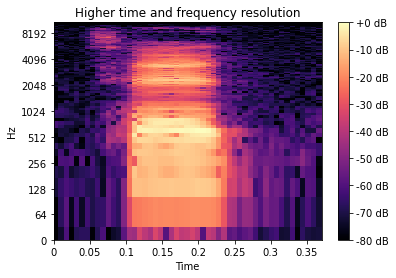

In [133]:
# draw spectrum by librosa, log scale in frequency
# https://librosa.org/doc/main/auto_examples/plot_display.html
fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=Ns, n_fft=Nf)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=Ns, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

(8000,)


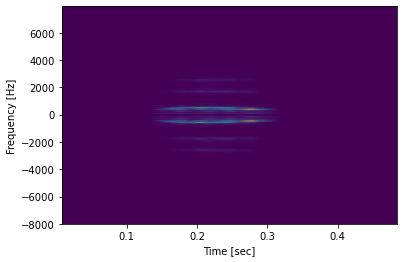

In [135]:
# draw spectrum using scipy - not working
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
print(x.shape)
f, t, Sxx = signal.spectrogram(x, Fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [136]:
# 0.2~0.22 부분을 추출한다. 
y = x[int(Fs*0.2):int(Fs*0.22)]

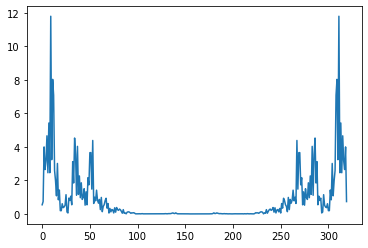

In [137]:
Y = np.abs(np.fft.fft(y))
plt.plot(Y)

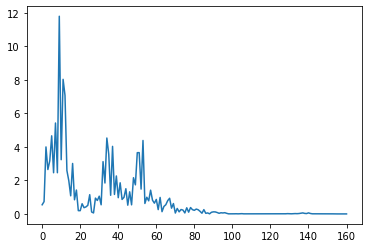

In [138]:
# 0~PI+1 까지의 절대값
Y = np.abs(np.fft.fft(y))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)

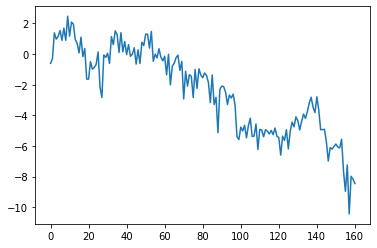

In [139]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)

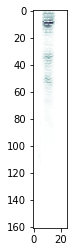

In [140]:
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)
plt.imshow(X, cmap=cmap_plot)

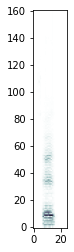

In [141]:
plt.imshow(X, cmap=cmap_plot, origin='lower')

Text(0, 0.5, 'frequency (Hz)')

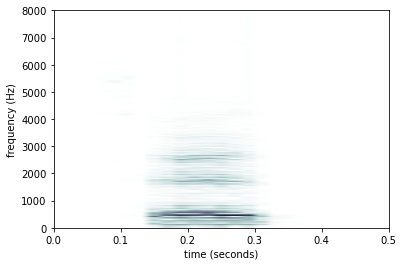

In [142]:
specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

15.019561761534204 0.08904421210449184


Text(0, 0.5, 'frequency (Hz)')

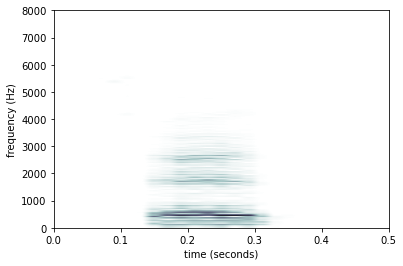

In [143]:
# Short-time Fourier transform in Absolute scale
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 80)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

In [125]:
# Followings are Assignments 

In [ ]:
# Complete 80% or more quantile minimum value spectrum drawing 

In [407]:
# import necessary pacakages
import sys
import numpy as np
import matplotlib
import librosa
from matplotlib import pyplot as plt
import librosa.display

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift


# parameters for signal analysis and drawing
#FIG_SIZE = (15,10)
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
#cmap_plot = plt.cm.bone # default colormap for spectrogram, gray
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray
#cmap_plot = plt.cm.plasma 
#cmap_plot = plt.cm.inferno
Fs = 16000

wavfile ='kdigits1-3.wav'
# load audio file with Librosa
x, Fs = librosa.load(wavfile, sr = Fs)

# 더 잘 보려고 시간축에서 조금 잘라낸다.
x_clip=x[Fs:(Fs*3)//2] # 음성이 있는 1~1.5[sec]정도를 보고자 함
x=x_clip

Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples

max val & min val
55.23911745428333 -44.11569631876111
max val & min val
41.60119743369822 -60.54152818472197


Text(0.5, 1.0, 'STFT with Hamming Window')

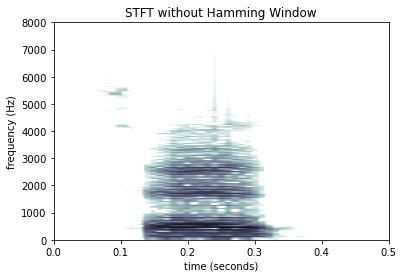

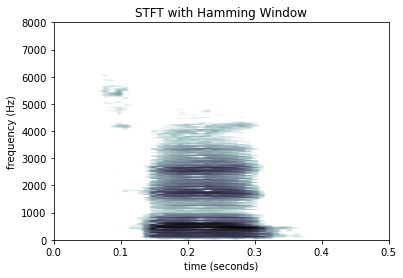

In [408]:
# Short-time Fourier transform with/without Hamming Window
# 10ms 간격, 20ms 분석 

# STFT의 결과로 알 수 있는 사실
## 신호가 Fs/2이하의 주파수 성분만 포함하고 있다.

# Hamming window의 효과
## maxval, minval이 조금 작아지고, 
## 약간의 blur가 들어간 효과를 얻을 수 있다.


def Spectrogram(x,Ns,Nf,flag_hamm):
    # x : 음성신호
    # Ns: shift number of samples
    # Nf: frame number of samples
    # flag_hmm: switch for hamming window 1/0 (ON/OFF)
    T = len(x)   # number of samples
    #num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
    num_frames = (T-Nf)//Ns + 1 
    hNo = Nf//2+1

    X = np.zeros((hNo,num_frames))
    
    if flag_hamm >0: # window setting
        win = librosa.filters.get_window('hamming', Nf, fftbins=True)
    else:
        win = np.ones(Nf)
        
    for i in range(num_frames):
        y = x[(i*Ns):(i*Ns+Nf)]

        y=np.fft.fft(y*win) 
        X[:,i]=np.log(np.abs( y[:hNo]))*20 #[dB] scale


    return X

# STFT without Hamming window
X=Spectrogram(x,Ns,Nf,0)

# STFT with Hamming window
X_hamming=Spectrogram(x,Ns,Nf,1)

# without hamming window
# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 80)
print('max val & min val')
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.figure()
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.title('STFT without Hamming Window')

# ====================================================================

# with hammming window
# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X_hamming[:])
vmin = np.percentile(X_hamming[:], 80)
print('max val & min val')
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.figure()
plt.imshow(X_hamming, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.title('STFT with Hamming Window')


In [ ]:
# Upsampling (interpolation)

Text(0.5, 1.0, 'Frequency Response of Hamming window')

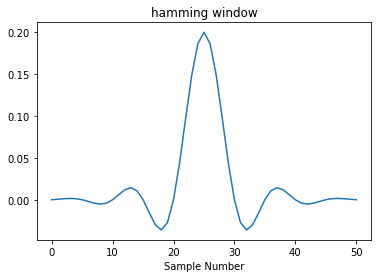

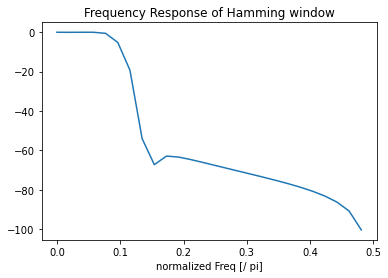

In [410]:
# Hamming window's in Frequency domain

# scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True, scale=True, nyq=None, fs=None)[source]
# FIR filter design using the window method.

# Hamming Window의 주파수 성분 확인
## 지정한 cutoff X Fs/2 이하의 신호에서는 gain이 0dB
## 지정한 cutoff X Fs/2 이상의 신호에서는 gain이 -30dB 이하의 값을 보인다.

## 즉, cutoff를 조정하는 것으로 Low Pass Filter로써 사용할 수 있다.


L_win=51
hNo=L_win//2+1
cutoff=0.2

a = signal.firwin(L_win, cutoff, window='hamming')

# Display Hamming window
plt.figure()
plt.plot(a)
plt.title("hamming window")
plt.xlabel("Sample Number")

S_a=np.fft.fft(a) # FFTed window

S_a=np.log10(abs(S_a[0:hNo]))*20 # use half of the result


normalized_freq=np.arange(0,len(S_a))/len(S_a)/2

plt.figure()
plt.plot(normalized_freq,S_a)
plt.xlabel('normalized Freq [/ pi]')
plt.title("Frequency Response of Hamming window")

In [373]:

from IPython.display import Audio
import soundfile

# Upsampling & Decimation 을 수행하는 함수
def resampling(x,p,q):
    # x : 음성신호
    # p : upsampling할 배수 (int)
    # q : decimation할 배수 (float <=1)
    
    L_win=51
    
    if p*q ==1:
        return x
    
    if not p==1: # Upsampling part
        x_resampled=np.zeros((len(x)*p,))
        # 1 차 보간법을 적용했다.
        for t_idx in range(0,len(x)*p):
            
            float_idx=t_idx/p
            low_idx=t_idx//p
            high_idx=low_idx+1
            if high_idx >= (len(x)):
                high_idx=len(x)-1
            
            k=float_idx-low_idx
            
            x_resampled[t_idx]=(1-k)*x[low_idx]+(k)*x[high_idx]
        
        # Low Pass Filtering
        cutoff=1/p
        a = signal.firwin(L_win, cutoff, window='hamming')
        x_resampled=np.convolve(x_resampled,a,"same")
        
        if q==1: # Upsampling만 하는 경우
            return x_resampled
        
    if not q==1: # Decimation part
        if p ==1: # 이전에 Upsampling이 수행되지 않은 경우
            # Low Pass Filter로 원하는 Fs/2보다 큰부분을 자른다.
            cutoff=q
            a = signal.firwin(L_win, cutoff, window='hamming')
            x=np.convolve(x,a,"same")
        else: # 이전에 Upsampling이 됐다면, 그 결과를 입력으로 사용한다.
            x=x_resampled
            
        L_new=int(len(x)*q)
        x_resampled=np.zeros(L_new,)
        
        # 1차 보간법을 적용했다.
        for t_idx in range(0,L_new):
            
            float_idx=t_idx/q
            low_idx=int(float_idx)
            high_idx=low_idx+1
            k=float_idx-low_idx
            if high_idx >= L_new:
                high_idx=L_new-1
            
            x_resampled[t_idx]=(1-k)*x[low_idx]+k*x[high_idx]
        
        return x_resampled
            
# Waveform, Spectrogram을 보여주는 Util함수
def total_plot(x,X,Fs):
    # x : 음성신호
    # X : 음성신호의 Spectrogram
    # Fs: sampling frequency
    
    plt.figure()
    librosa.display.waveplot(x,sr=Fs)
    plt.title('WaveFrom of X_'+str(Fs/1000)+'kHz')

    vmax = np.max(X[:])
    vmin = np.percentile(X[:], 75)

    print('max val & min val')
    print(vmax, vmin)

    specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
    plt.figure()
    plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
    plt.xlabel('time (seconds)')
    plt.ylabel('frequency (Hz)')
    plt.title('Spectrogram of X_'+str(Fs/1000)+'kHz')

max val & min val
41.60119743369822 -75.45510986467447


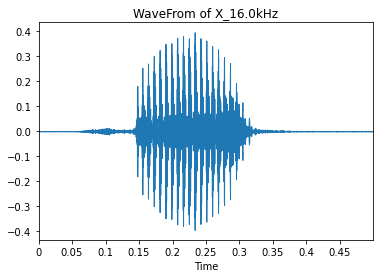

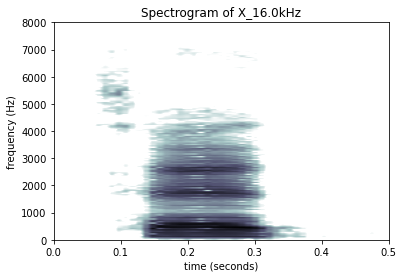

In [411]:
# Display original signal(16kHz signal)

# Spectrogram을 보면, 8kHz이하의 주파수 성분만 포함하는 것을 알 수 있다.

Fs=16000

x=x
X=Spectrogram(x,Ns,Nf,1)
total_plot(x,X,Fs)
Audio(x,rate=Fs)


max val & min val
55.39074471870993 -98.21178491597047


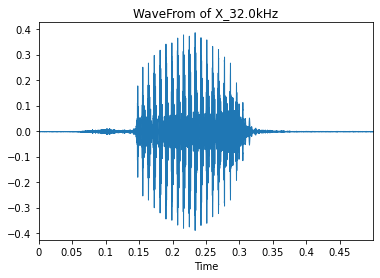

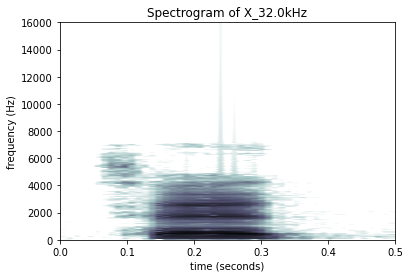

In [364]:
# 32k Upsampling

#===========================================
# 16kHz -> 32kHz 

Fs_wanted=32000

# 16kHz -> 32kHz 
p=int(Fs_wanted/Fs)
q=1
x_new=resampling(x,p,q)
X_new=Spectrogram(x_32k,Ns*p,Nf*p,1)

total_plot(x_new,X_new,Fs_wanted)
soundfile.write(wavfile.replace('.wav','_32k.wav'),
               x_new,
               Fs_wanted,
               format='WAV')
Audio(x_new,rate=Fs_wanted)


max val & min val
63.522252277804284 -102.32427787960829


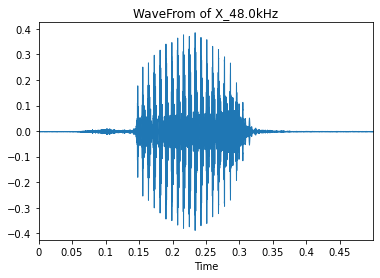

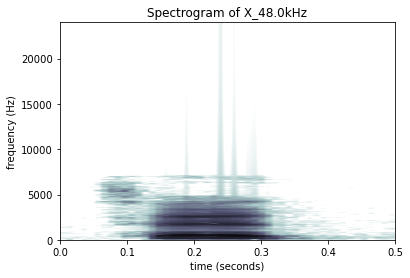

In [365]:
# 48k Upsampling

#===========================================
# 16kHz -> 48kHz

Fs_wanted=48000

# 16kHz -> 48kHz
p=int(Fs_wanted/Fs)
q=1
x_new=resampling(x,p,q)
X_new=Spectrogram(x_new,Ns*p,Nf*p,1)

total_plot(x_new,X_new,Fs_wanted)
soundfile.write(wavfile.replace('.wav','_48k.wav'),
               x_new,
               Fs_wanted,
               format='WAV')
Audio(x_new,rate=Fs_wanted)

max val & min val
61.8221600536041 -101.83893681423594


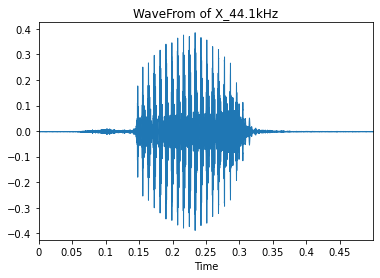

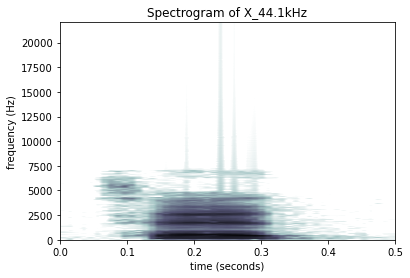

In [412]:
# 44.1kHz upsampling
#==============================================
# 16kHz -> 44.1kHz

# 44.1kHz는 16kHz의 정수배가 아니니까,
# 1. ceil 값으로 upsampling을 하고,
# 2. 22.05kHz까지 주파수 성분을 갖도록 Low Pass Filter를 적용한 후
# 3. 그 결과에 44.1kHz의 Fs가 되도록 downsampling을 수행한다.

Fs_wanted=44100
F_tmp=48000
# 16kHz -> 44.1kHz
p=F_tmp//Fs
q=Fs_wanted/F_tmp

# 단계별로 수행하는 경우
# x_new=resampling(x,p,1)      # 16kHz -> 48kHz
# x_new=resampling(x_new,1,q)  # 48kHz -> 44.1kHz

# 위의 단계들을 한번에 수행하는 경우

# 16kHz -> 44.1kHz
x_new=resampling(x,p,q)
X_new=Spectrogram(x_new,int(Ns*p*q),int(Nf*p*q),1)

total_plot(x_new,X_new,Fs_wanted)
soundfile.write(wavfile.replace('.wav','_44k.wav'),
               x_new,
               Fs_wanted,
               format='WAV')
Audio(x_new,rate=Fs_wanted)

In [413]:
#Decimation

max val & min val
19.227583333704693 -58.59383314802091


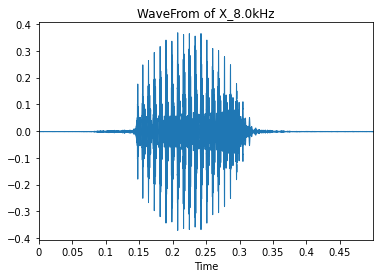

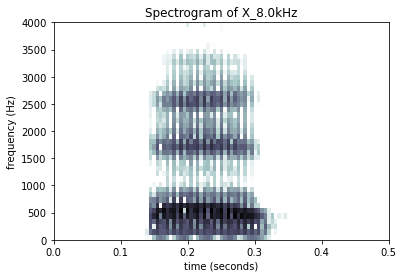

In [414]:
wavfile_32k=wavfile.replace('.wav','_32k.wav')
x_32k, Fs_32k=librosa.load(wavfile_32k,sr=32000)
#===========================================
# 32kHz -> 8kHz 

# Decimaiton 오차를 줄이려면, 
# 32kHz -> 16kHz -> 8kHz순으로 Decimation 하는게 좋겠지만,
# 32kHz는 8kHz의 정수배라서 큰 위화감 없는 결과를 얻을 수 있다.

Fs_8k=8000

# 32kHz -> 8kHz 
p=1
q=(Fs_8k)/Fs_32k
x_8k=resampling(x_32k,1,q)

X_8k=Spectrogram(x_8k,int(Ns*q),int(Nf*q),1)
total_plot(x_8k,X_8k,Fs_8k)
soundfile.write(wavfile_32k.replace('.wav','_8k.wav'),
               x_new,
               Fs_8k,
               format='WAV')
Audio(x_8k,rate=Fs_8k)

max val & min val
26.377166078263514 -70.2998160827089


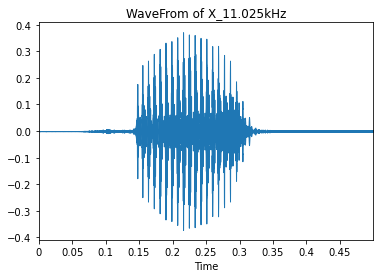

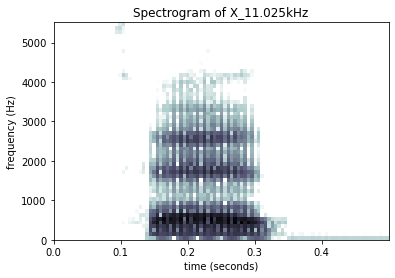

In [404]:
# ===========================================
# 32kHz -> 11.025kHz 

# Decimation오차를 줄이기 위해서
# 32kHz -> 16kHz -> 11.025kHz 순으로 Decimation을 수행했다. 

Fs_11k=11025

# 32kHz -> 16kHz 
p=1
Fs_tmp=16000
q1=(Fs_tmp)/Fs_32k
x_11k=resampling(x_32k,1,q1)

# 16kHz -> 11.025kHz
q2=(Fs_11k)/Fs_tmp
x_11k=resampling(x_11k,1,q2)

X_11k=Spectrogram(x_11k,int(Ns*q1*q2),int(Nf*q1*q2),1)
total_plot(x_11k,X_11k,Fs_11k)
soundfile.write(wavfile_32k.replace('.wav','_11k.wav'),
               x_new,
               Fs_11k,
               format='WAV')
Audio(x_11k,rate=Fs_11k)

max val & min val
16.475792429152236 -65.75651374433063


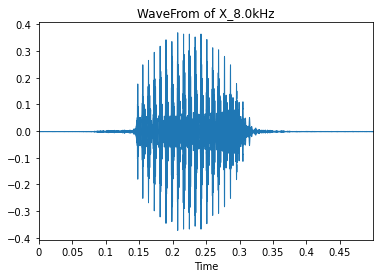

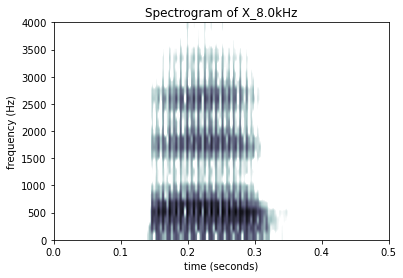

In [403]:
wavefile_48k=wavfile.replace('.wav','_48k.wav')
x_48k, Fs_48k=librosa.load(wavefile_48k,sr=48000)
#===========================================
# 48kHz -> 8kHz 

# Decimaiton 오차를 줄이려면, 
# 48kHz -> 24kHz -> 8kHz순으로 Decimation 하는게 좋겠지만,
# 48kHz는 8kHz의 정수배라서 큰 위화감 없는 결과를 얻을 수 있다.

Fs_8k=8000
p=1
q=(Fs_8k)/Fs_48k
x_8k=resampling(x_48k,1,q)
X_8k=Spectrogram(x_8k,int(Ns*q),int(Nf*q),1)
total_plot(x_8k,X_8k,Fs_8k)
soundfile.write(wavefile_48k.replace('.wav','_8k.wav'),
               x_new,
               Fs_8k,
               format='WAV')
Audio(x_8k,rate=Fs_8k)


max val & min val
22.36156468610887 -76.52051241692931


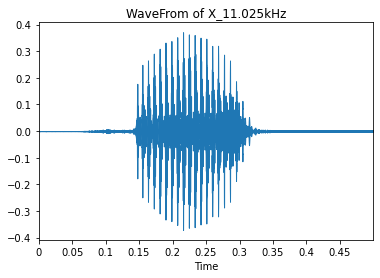

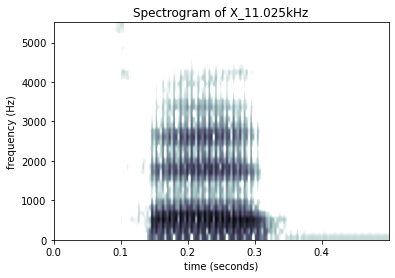

In [397]:
# ===========================================
# 48kHz -> 11.025kHz 

# Decimation오차를 줄이기 위해서
# 48kHz -> 16kHz -> 11.025kHz 순으로 Decimation을 수행했다. 

Fs_11k=11025

# 48kHz -> 16kHz
p=1
Fs_tmp=16000
q1=(Fs_tmp)/Fs_48k
x_11k=resampling(x_48k,1,q1)

# 16kHz -> 11.025kHz
q2=(Fs_11k)/Fs_tmp
x_11k=resampling(x_11k,1,q2)

X_11k=Spectrogram(x_11k,int(Ns*q1*q2),int(Nf*q1*q2),1)
total_plot(x_11k,X_11k,Fs_11k)
soundfile.write(wavefile_48k.replace('.wav','_11k.wav'),
               x_new,
               Fs_11k,
               format='WAV')
Audio(x_11k,rate=Fs_11k)

max val & min val
22.189530720034618 -75.47243722833083


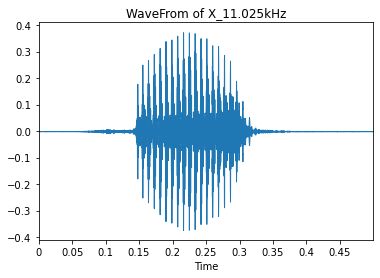

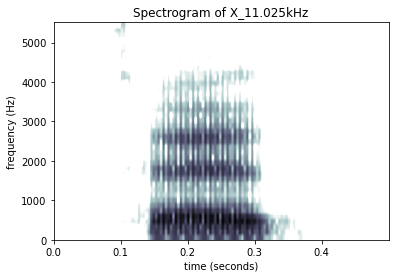

In [400]:
wavfile_44k=wavfile.replace('.wav','_44k.wav')
x_44k, Fs_44k=librosa.load(wavfile_44k,sr=44100)
# ===========================================
# 44kHz -> 11.025kHz 

Fs_11k=11025

# 44kHz -> 11.025kHz
p=1
q1=(Fs_11k)/Fs_44k
x_11k=resampling(x_44k,1,q1)

X_11k=Spectrogram(x_11k,int(Ns*q1),int(Nf*q1),1)
total_plot(x_11k,X_11k,Fs_11k)
soundfile.write(wavfile_44k.replace('.wav','_11k.wav'),
               x_new,
               Fs_11k,
               format='WAV')
Audio(x_11k,rate=Fs_11k)


max val & min val
15.156136533378646 -66.49667986853461


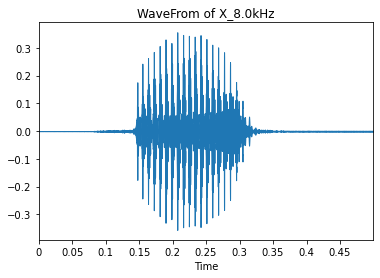

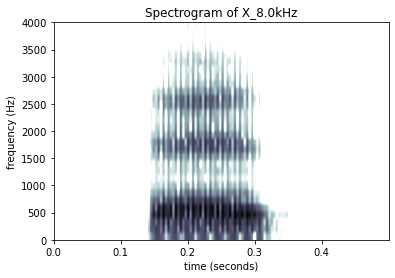

In [401]:
#===========================================
# 44kHz -> 8kHz 

# Decimation오차를 줄이기 위해서
# 44.1kHz -> 11.025kHz -> 8kHz 순으로 Decimation을 수행했다. 

Fs_8k=8000

# 44.1kHz -> 11.025kHz
q1=(Fs_11k)/Fs_44k
x_11k=resampling(x_44k,1,q1)

# 11.025kHz -> 8kHz
q2=(Fs_8k/Fs_11k)
x_8k=resampling(x_11k,1,q2)

X_8k=Spectrogram(x_8k,int(Ns*q1*q2),int(Nf*q1*q2),1)
total_plot(x_8k,X_8k,Fs_8k)
soundfile.write(wavfile_44k.replace('.wav','_8k.wav'),
               x_new,
               Fs_8k,
               format='WAV')
Audio(x_8k,rate=Fs_8k)
